ADQUISICIÓN Y PLOTEO DE LA SEÑAL ECG EN ESTADO BASAL

Fs = 1000 Hz
Ts = 0.001 s


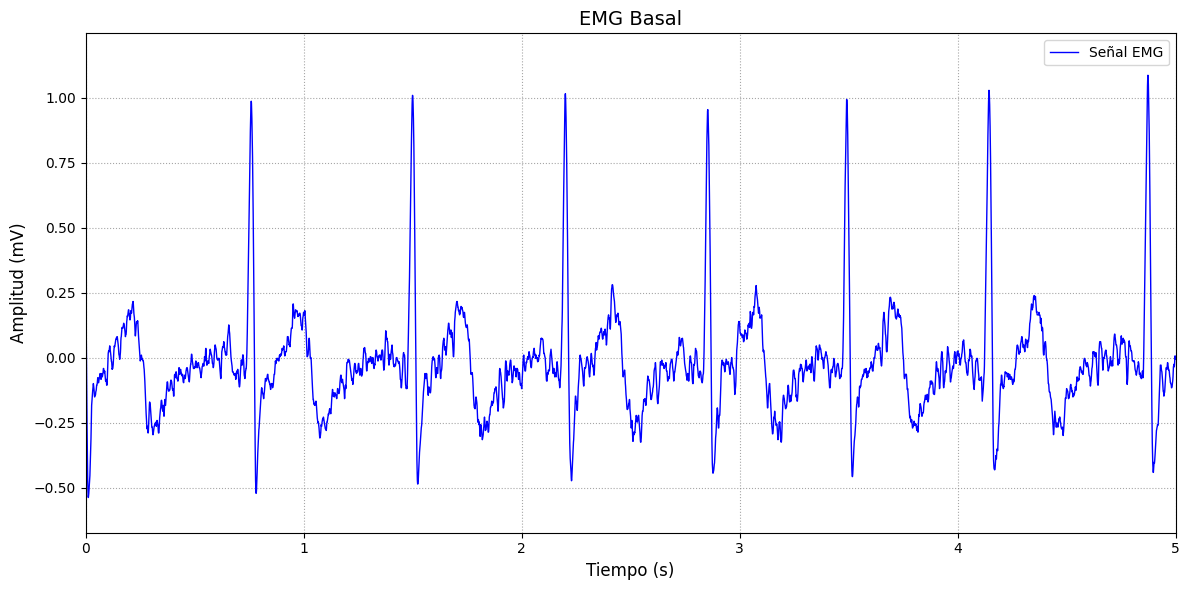

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Cargar datos desde el archivo txt
file_path = r"../../Documentacion\Laboratorios\Lab4_ECG\ECG_respiracion_normal.txt"  # Ruta del archivo
array = np.genfromtxt(file_path, skip_header=2)

# Configuración de la señal
# Asegurarse de que la columna indexada es la correcta (columna 6)
canalA2 = array[:, 6]  # Todas las filas de la columna 6 -> Canal A2 ECG, valores de 0 a 1024

# Parámetros de muestreo
fs = 1000
Ts = 1 / fs
print(f"Fs = {fs} Hz\nTs = {Ts} s")

# Para conocer el número de filas
M = canalA2.shape[0]  # shape devuelve una tupla con dimensiones del array
n = np.arange(0, M)
t = n * Ts  # Vector de tiempo
VCC = 3.3  # Voltaje de operación
ECG_V = (((canalA2 / pow(2, 10)) - 0.5) * VCC)/1000 # Calculo a voltios se divide entre la equivalencia en mV
ECG_mV = ECG_V * pow(10, 3)

# Ploteamos la lectura
plt.figure(figsize=(12, 6), dpi=100)  # Tamaño de la figura y resolución
plt.plot(t, ECG_mV, label="Señal EMG", color='b', linewidth=1.0)  # Color y grosor de la línea
plt.grid(linestyle=":", which='both', color='gray', alpha=0.7)  # Mejorar la cuadrícula
plt.title("EMG Basal", fontsize=14)  # Tamaño de la fuente del título
plt.xlabel("Tiempo (s)", fontsize=12)  # Tamaño de la fuente de la etiqueta del eje x
plt.ylabel("Amplitud (mV)", fontsize=12)  # Tamaño de la fuente de la etiqueta del eje y
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV) - 0.1, max(ECG_mV) + 0.1])  # Límite del eje y ajustado
plt.legend(loc="upper right", fontsize=10)  # Tamaño de la fuente de la leyenda
plt.xticks(fontsize=10)  # Tamaño de la fuente de los ticks del eje x
plt.yticks(fontsize=10)  # Tamaño de la fuente de los ticks del eje y
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()

PREPROCESAMIENTO

FILTRO PASABANDA BUTTERWORTH (5-150 Hz) N°orden = 3

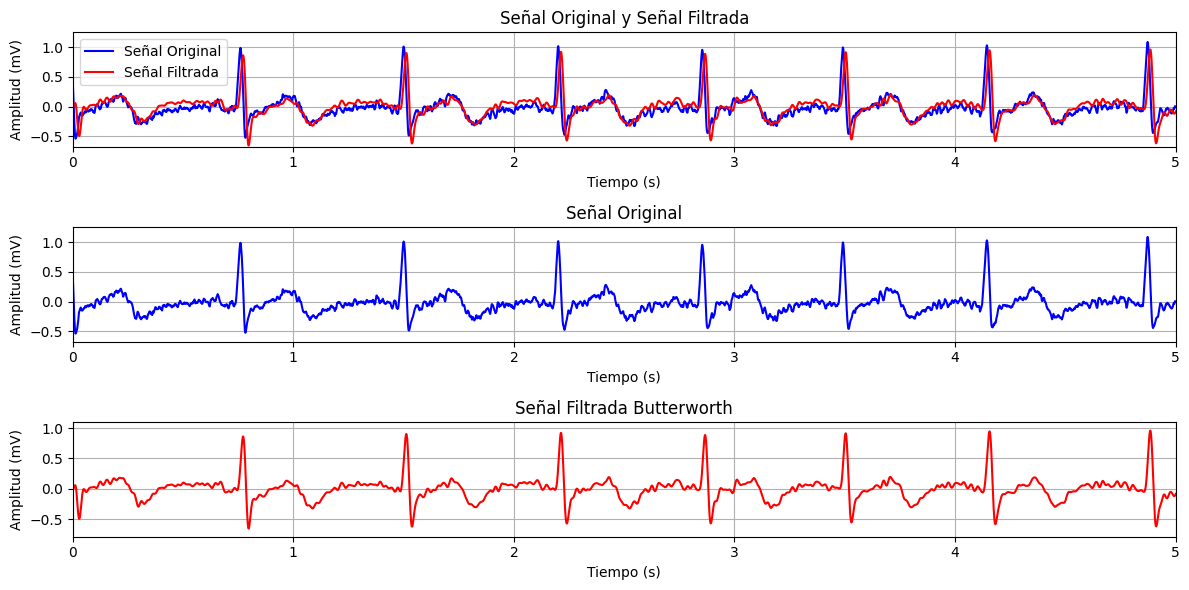

In [754]:
# Definir las frecuencias de corte del filtro pasabanda
lowcut = 0.5  # Frecuencia de corte baja en Hz
highcut = 35  # Frecuencia de corte alta en Hz
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Diseñar el filtro Butterworth pasabanda
N_ord = 4
b, a = signal.butter(N_ord, [low, high], btype='band')

# Aplicar el filtro a la señal ECG
ECG_mV_Butterworth= signal.lfilter(b, a, ECG_mV)

# Gráfico 1: Señal original y señal filtrada juntas
plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(3, 1, 1)
plt.plot(t, ECG_mV, label='Señal Original', color='blue')
plt.plot(t, ECG_mV_Butterworth, label='Señal Filtrada', color='red')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV) - 0.1, max(ECG_mV) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal Original y Señal Filtrada')
plt.legend()
plt.grid(True)

# Gráfico 2: Señal original
plt.subplot(3, 1, 2)
plt.plot(t, ECG_mV, color='blue')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV) - 0.1, max(ECG_mV) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal Original')
plt.grid(True)

# Gráfico 3: Señal filtrada
plt.subplot(3, 1, 3)
plt.plot(t, ECG_mV_Butterworth, color='red')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV_Butterworth) - 0.1, max(ECG_mV_Butterworth) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal Filtrada Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

FILTRO NOTCH (50 hZ)

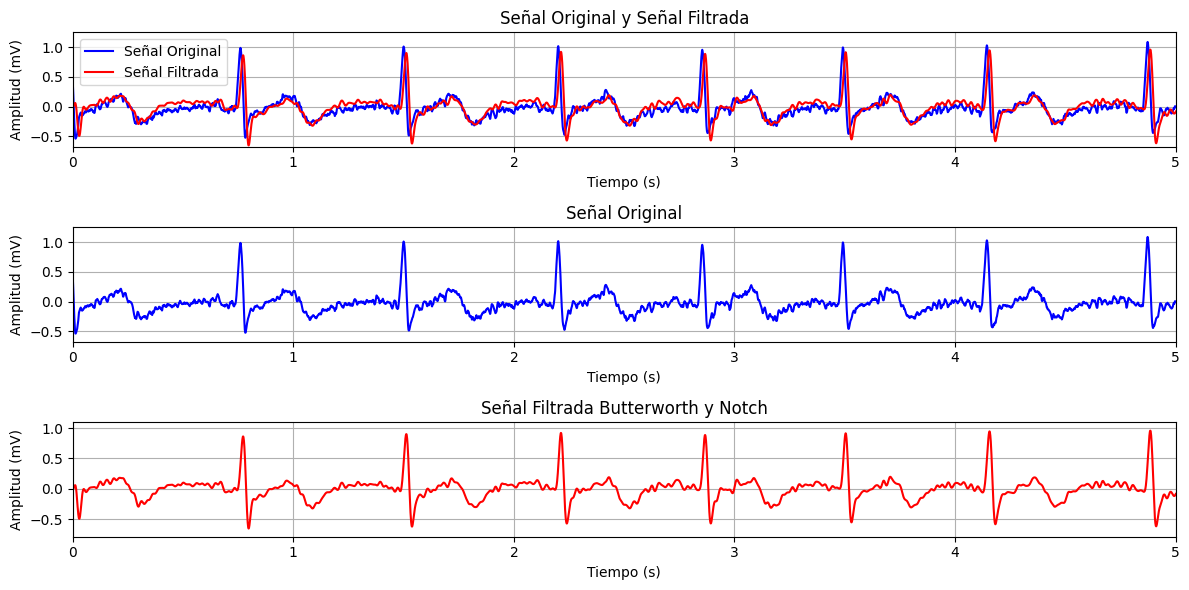

In [755]:
quality_factor=30
freq = 50
freq = freq / nyquist
b, a = signal.iirnotch(freq, quality_factor)
ECG_mV_Butterworth_Notch = signal.filtfilt(b, a, ECG_mV_Butterworth)


# Gráfico 1: Señal original y señal filtrada por BUtterworth y Notch juntas
plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(3, 1, 1)
plt.plot(t, ECG_mV, label='Señal Original', color='blue')
plt.plot(t, ECG_mV_Butterworth_Notch, label='Señal Filtrada', color='red')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV) - 0.1, max(ECG_mV) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal Original y Señal Filtrada')
plt.legend()
plt.grid(True)

# Gráfico 2: Señal original
plt.subplot(3, 1, 2)
plt.plot(t, ECG_mV, color='blue')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV) - 0.1, max(ECG_mV) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal Original')
plt.grid(True)

# Gráfico 3: Señal filtrada Butterworth Notch
plt.subplot(3, 1, 3)
plt.plot(t, ECG_mV_Butterworth_Notch, color='red')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV_Butterworth_Notch) - 0.1, max(ECG_mV_Butterworth_Notch) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal Filtrada Butterworth y Notch')
plt.grid(True)

plt.tight_layout()
plt.show()


PROCESAMIENTO DE LA SEÑAL

1. FILTRO DERIVATIVO
2. TRANSFORMADA DISCRETA WAVELET (DWT)
    - FAMILIA COIF5
    - 8 NIVELES
    - RECONSTRUCCIÓN DE NIVELES DE DETALLE D4, D5 Y D6, Y EL COEFICIENTE DE APROXIMACIÓN A4
3. FILTRO CUADRÁTICO

FILTRO DERIVATIVO

H(z) = fs/2*(1-z(-2))


C:\Users\kakow\AppData\Local\Temp\ipykernel_2288\461113412.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), 'b')


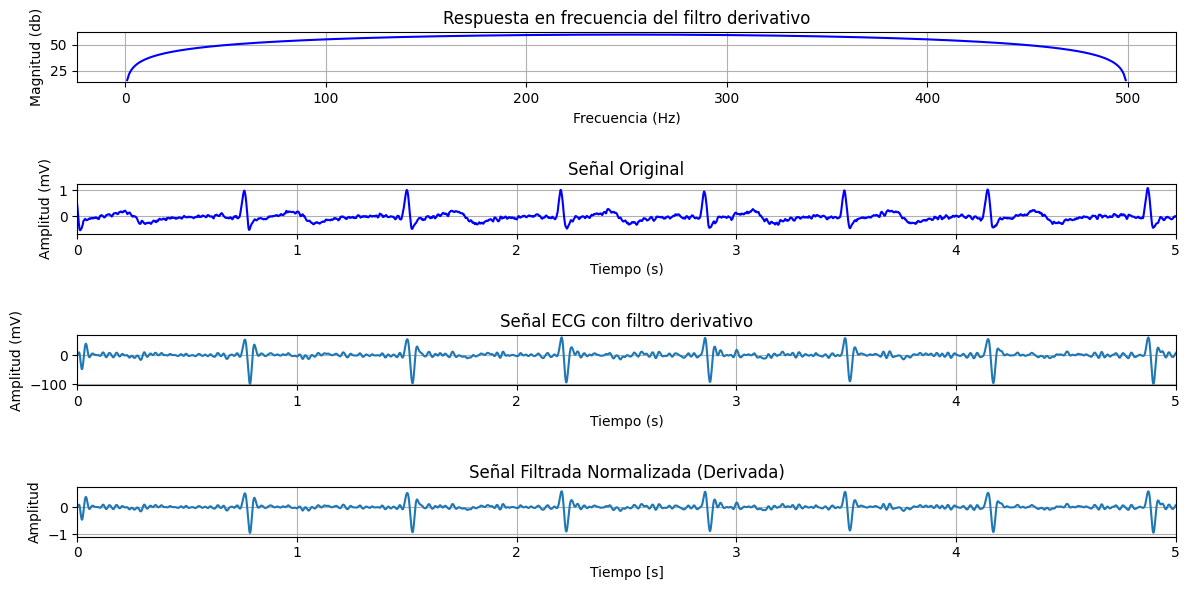

In [756]:
# Filtro derivativo
b = [fs / 2, 0, -fs / 2]
w, h = signal.freqz(b, 1, fs=1000)
ECG_mV_derivative = signal.lfilter(b, 1, ECG_mV_Butterworth_Notch)


plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(4, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (db)')
plt.title('Respuesta en frecuencia del filtro derivativo')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, ECG_mV, color='blue')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV) - 0.1, max(ECG_mV) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('\nSeñal Original')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t,ECG_mV_derivative)
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV_derivative) - 0.1, max(ECG_mV_derivative) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal ECG con filtro derivativo')
plt.grid(True)

# Normalizar la señal filtrada
ECG_mV_derivative_norm = ECG_mV_derivative *np.max(np.abs(ECG_mV_Butterworth_Notch))/ np.max(np.abs(ECG_mV_derivative))
plt.subplot(4, 1, 4)
plt.plot(t, ECG_mV_derivative_norm)
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV_derivative_norm) - 0.1, max(ECG_mV_derivative_norm) + 0.1])  # Límite del eje y ajustado
plt.title('Señal Filtrada Normalizada (Derivada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()


DWT
- Coif5
- 8 niveles
- Reconstruction (d4, d5, d6, a4)

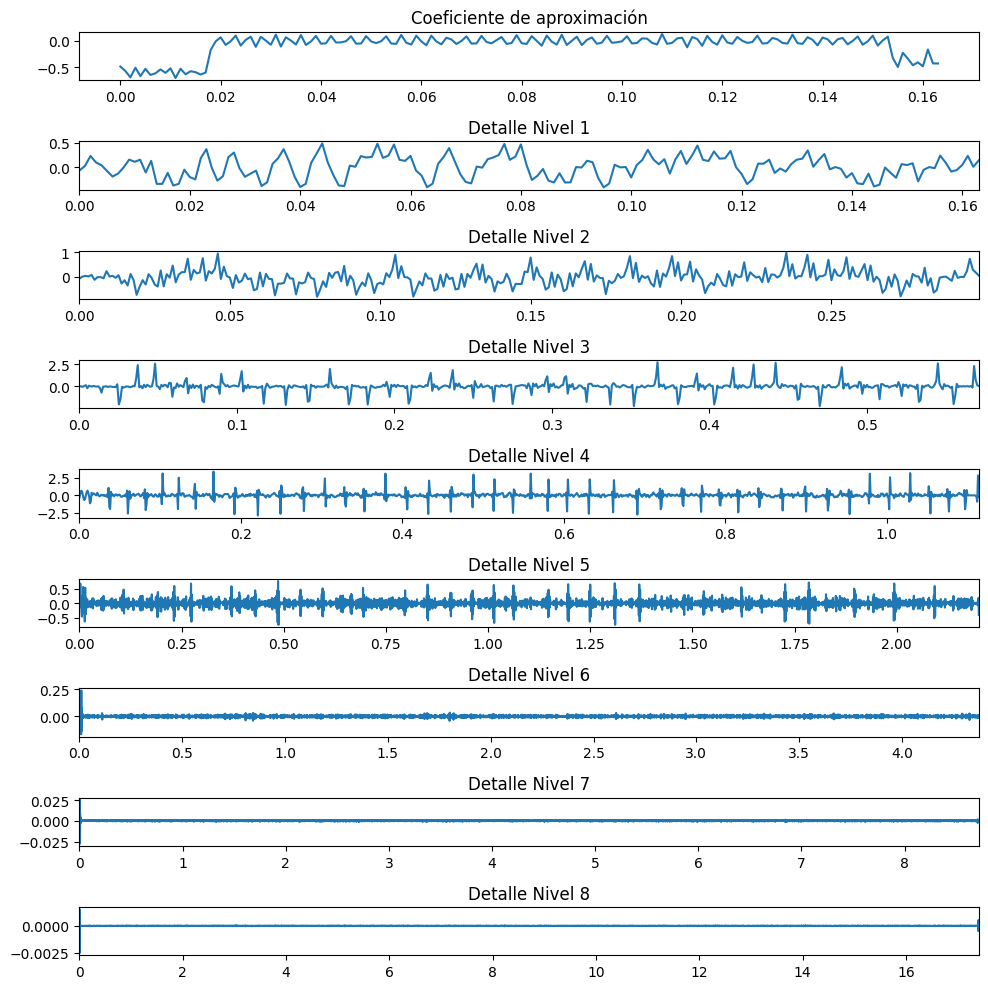

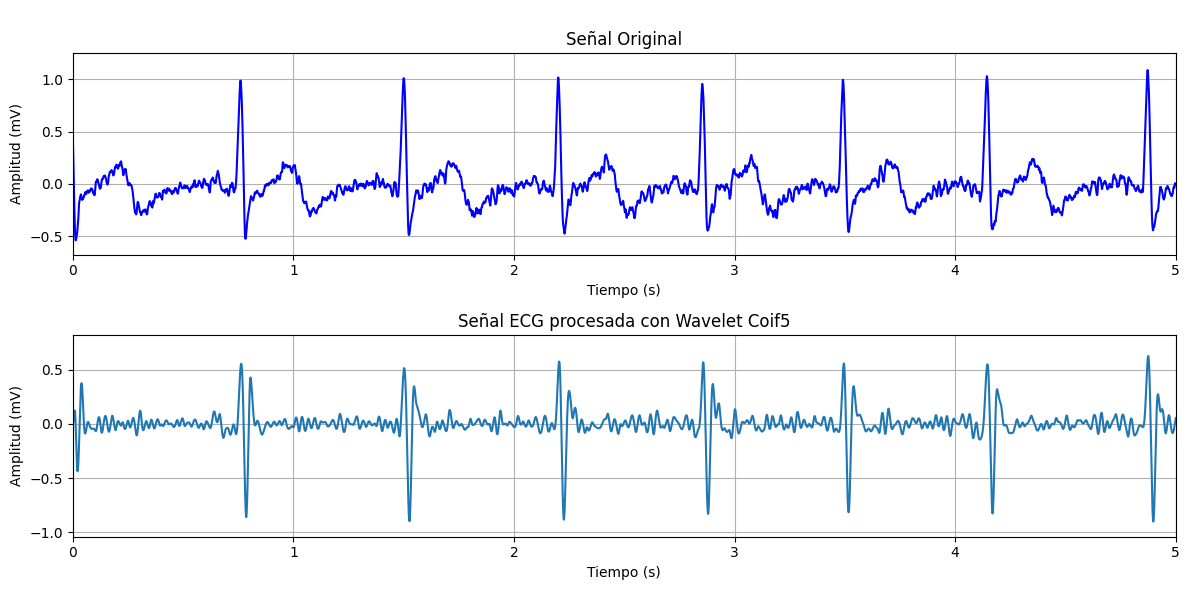

In [757]:

# Apply the DWT
niveles = 8
coeficientes = pywt.wavedec(ECG_mV_derivative_norm, 'coif5', level=niveles)

# Escoger los coeficientes de detalle d4, d5, d6 y el cofeiciente de aproximación
# coeficientes = [a4, d8, d7, d6, d5, d4, d3, d2, d1]

a4 = coeficientes[0]
d1 = np.zeros_like(coeficientes[-1])
d2 = np.zeros_like(coeficientes[-2])
d3 = np.zeros_like(coeficientes[-3])
d4 = coeficientes[-4]
d5 = coeficientes[-5]
d6 = coeficientes[-6]
d7 = np.zeros_like(coeficientes[-7])
d8 = np.zeros_like(coeficientes[-8])

nuevos_coeficientes = [a4, d8, d7, d6, d5, d4, d3, d2, d1]

# Reconstrucción de la señal
ECG_wavelet = pywt.waverec(nuevos_coeficientes, 'coif5')

# Plot the original signal and detail coefficients
plt.figure(figsize=(10, 10))

# Ploteo de los coeficientes de detalle
for i, detalle in enumerate(coeficientes[1:], 1):  # empezar por el segundo
    plt.subplot(niveles + 1, 1, i + 1)  # numeor de subplots
    tiempo_detalle = t[:len(detalle)]
    plt.plot(tiempo_detalle, detalle)
    plt.xlim(0, tiempo_detalle[-1])  # Limitar el eje x al tiempo de cada detalle
    plt.title(f'Detalle Nivel {i}')

# Plotear el coeficiente de aproximación
plt.subplot(niveles + 1, 1, 1)  # numero de subplots
plt.plot(t[:len(coeficientes[0])], coeficientes[0]) 
plt.title('Coeficiente de aproximación')

plt.tight_layout()
plt.show()

# Ploteo de la señal  original y la señal procesada con wavelet

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, ECG_mV, color='blue')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV) - 0.1, max(ECG_mV) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('\nSeñal Original')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t,ECG_wavelet)
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_wavelet) - 0.1, max(ECG_wavelet) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal ECG procesada con Wavelet Coif5')
plt.grid(True)

plt.tight_layout()
plt.show()


FILTRO CUADRÁTICO

Este operador solo tiene como función elevar al cuadrado los valores de la señal.

y[n]=x^2[n]

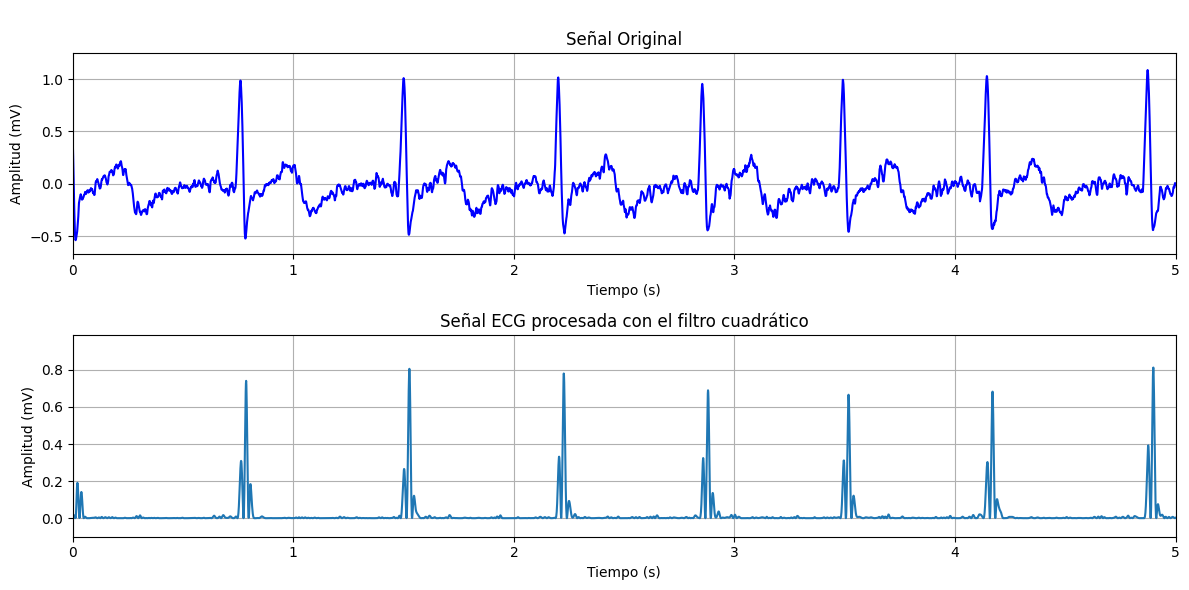

In [758]:
# Filtro cuadrado
ECG_cuadratico = np.square(ECG_wavelet)

# Ploteo de la señal original y la señal procesada con el filtro cuadrático

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, ECG_mV, color='blue')
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_mV) - 0.1, max(ECG_mV) + 0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('\nSeñal Original')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t,ECG_cuadratico)
plt.xlim([0, 5])  # Límite del eje x
plt.ylim([min(ECG_cuadratico)-0.1,  max(ECG_cuadratico)+0.1])  # Límite del eje y ajustado
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal ECG procesada con el filtro cuadrático')
plt.grid(True)

plt.tight_layout()
plt.show()

DETECTION DE PICOS

Para esta parte trabajaremos con toda la señal

El valor del umbral de pico R de entrada es  0.22129912038766478
El valor de la distancias entre picos R es  300.0


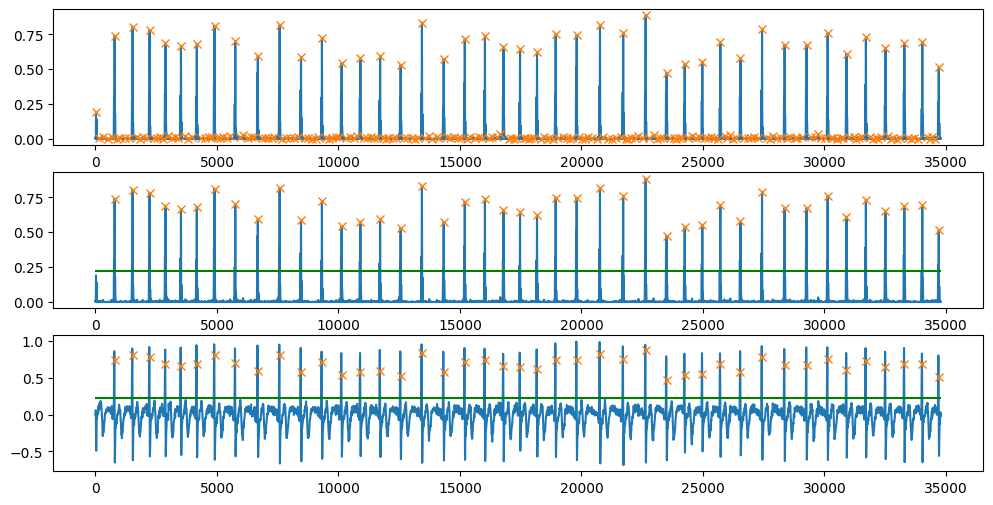

In [759]:
# Marcadores de picos
peaks_generales, _ = find_peaks(ECG_cuadratico, distance=100)

# Encontrar los umbrales de pico R y distancia entre picos
f_samples = len(peaks_generales)
umbral_y = np.max(ECG_cuadratico[peaks_generales[:f_samples]])*0.25
umbral_x = 0.3*fs
print ("El valor del umbral de pico R de entrada es ", umbral_y)
print ("El valor de la distancias entre picos R es ", umbral_x)

# Encontrar los picos R

peaks_R, r_loc = find_peaks(ECG_cuadratico, height=umbral_y, distance = umbral_x)

# Ploto de picos generales y picos R

plt.figure(figsize=(12, 6))
# Picos generales
plt.subplot(3, 1, 1)
plt.plot(ECG_cuadratico)
plt.plot(peaks_generales, ECG_cuadratico[peaks_generales], "x")

# Picos R
plt.subplot(3, 1, 2)
plt.plot(ECG_cuadratico)
plt.plot(peaks_R, ECG_cuadratico[peaks_R], "x")
plt.hlines(umbral_y, 0, len(ECG_cuadratico), colors='green')

# Picos R en ña señal original
plt.subplot(3, 1, 3)
plt.plot(ECG_mV_Butterworth_Notch)
plt.plot(peaks_R, ECG_cuadratico[peaks_R], "x")
plt.hlines(umbral_y, 0, len(ECG_cuadratico), colors='green')
plt.show()



CALCULO DEL RMSDD

El valor del RMSSD es  55.39415307703454


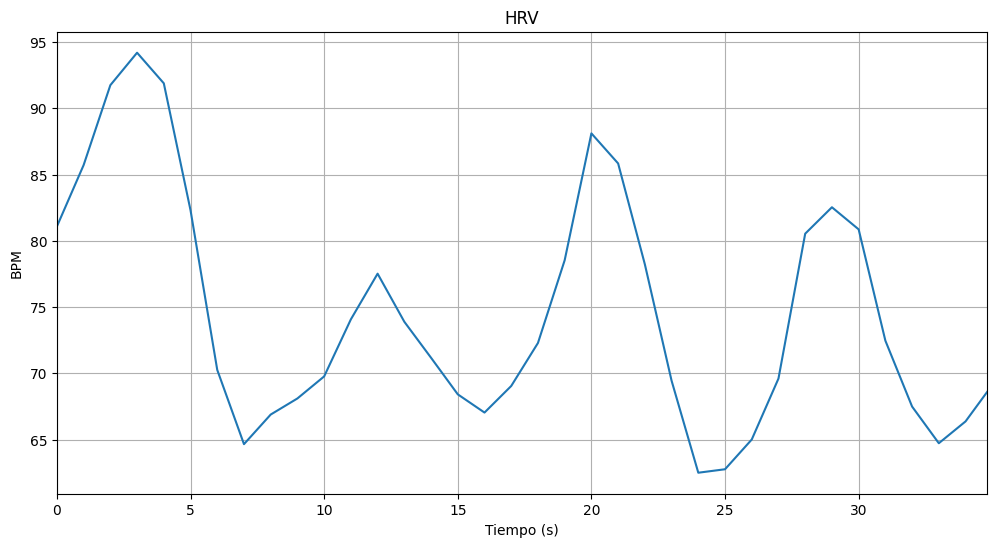

In [760]:
# Ubicación de los picos en el tiempo
R_loc_time = t[peaks_R]

# Calculo del HRV (no interpolado)

HRV = np.diff(R_loc_time)

# Calculo del RMSSD
resta_RR = np.diff(HRV)
resta_RR2 = np.square(resta_RR)
suma_resta_RR2 = np.sum(resta_RR2)
norm_resta_RR2 = suma_resta_RR2 / len(resta_RR)
RMSSD = np.sqrt(norm_resta_RR2)

# En milisegundos
RMSSD_ms = RMSSD * 1000
print("El valor del RMSSD es ", RMSSD_ms)

# Calculo del BPM
BPM = (1/HRV)*60

# Ploteo del Intervalo RR
plt.figure(figsize=(12, 6))
plt.plot(BPM)
plt.xlim(0,t[-1])
plt.xlabel('Tiempo (s)')
plt.ylabel('BPM')
plt.title('HRV')
plt.grid(True)
plt.show()
